# 色座標変換プログラム実行プログラム
モジュールとして変換プログラムを読み込んで使用する。<br>
このプログラムはメイン関数としてのみ使用する。

- 着色に関して参考にできそう<br>
https://www.t-kougei.ac.jp/activity/research/pdf/vol36-1-09.pdf

- ToDo<br>
    - xyz->RGBの逆変換も作る
    - 各モジュールに対しても同様に逆変換を作る

    - プロットの色をRGBまたはカラーコードで指定する -> 色度図の色の変化をわかりやすくする<br>
    RGB指定の場合、0~255ではなく、0~1で指定する。<br>
    https://note-tech.com/matplotlib-color/#toc3

    - 測色結果を元に色変換ができるようにする（汎用性の向上）
    - RGB - L*a*b*を作成
    - RGB - lmsを作成
    - RGB - dklを作成



#### ○ 必要なライブラリのインポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# ↓これがないとグラフが表示されない。（画像として表示されるので動かすことはできない。）
# %matplotlib inline

# ↓jupytor note book で使う時用（グリグリ動かせるようになる）
%matplotlib notebook

#### ○ 作成したモジュールのインポート

In [3]:
import __main__
from color_conversion_modules import myfunc_ConversionColor
# 動かない時はリスタート

#### ○ メイン関数

plot
xyz


<IPython.core.display.Javascript object>


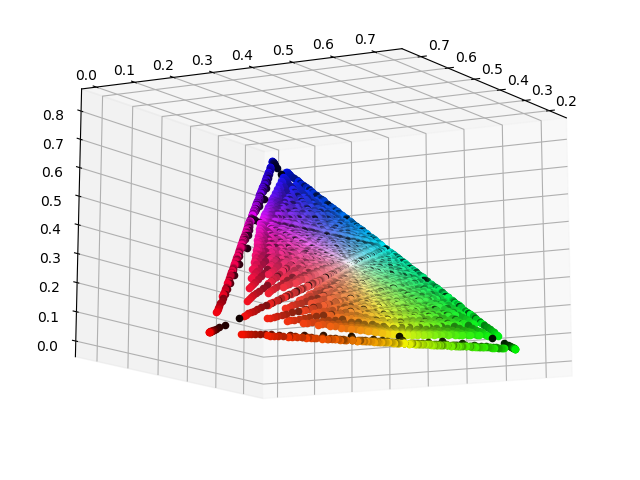

In [4]:
if __name__ == "__main__":
    inst_RGB_and_xyz = myfunc_ConversionColor.RGB_and_xyz()        # インスタンス生成
    inst_Luv_and_xyz = myfunc_ConversionColor.Luv_and_xyz()        # インスタンス生成

    inputNum = input()
    
    if inputNum == "plot":      # グラフをプロットする処理
        
        inputNum2 = input()
        
        if inputNum2 == "xyz":
            # ====================================
            # xyz色度座標値をプロットする。
            # ====================================
            # x,y,z = inst_RGB_and_xyz.xyz_for_plot()           # RGB0~255全てを算出して配列に格納（プロット用データ）
            # ax.scatter(x, y, z, color='gray')
            inst_RGB_and_xyz.xyz_for_plot()
            
        else:   # 例外処理
            print("入力値エラー(半角英字で入力する)")


    elif inputNum == "num":     # 座標を取得する処理
        # ====================================
        # RGBの三刺激値(0~255)からxyz色度座標値を求める。
        # ====================================
        x, y, z, Y = inst_RGB_and_xyz.RGB2xyz(255, 0, 0)     # 指定されたRGBの色座標を算出
        print('(x, y, z) = ', (x, y, z))

        R,G,B = inst_RGB_and_xyz.xyL2RGB(x, y, Y)
        print('(r, g, b) = ', (R, G, B))

        # ====================================
        # RGBの三刺激値(0~255)からl*u*v*色度座標値を求める。
        # ====================================
        L_star,u_star,v_star = inst_Luv_and_xyz.RGB2Luv(255, 0, 0)
        print(L_star, u_star, v_star)


    else:   # 例外処理
        print("入力値エラー(半角数字で入力する。)")

    plt.show()